In [40]:
from processing import get_returns, get_logreturns
from portfolio import PortfolioManager
from risk import max_drawdown, sharpe_ratio, volatility
from plot_portfolio import plot_portfolio, plot_return_distribution_with_stats

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cvxpy import ECOS


# Portfolio optimization

In [58]:
data = pd.read_csv("prices.csv", index_col = 0, parse_dates = True)
qqq = pd.read_csv("qqq.csv", index_col = 0, parse_dates = True).squeeze()
prices_gold_bond = pd.read_csv("prices_gold_bond.csv", index_col = 0, parse_dates = True)
vix = pd.read_csv("vic.csv", index_col = 0, parse_dates = True).squeeze()

In [42]:
data = pd.concat([data, prices_gold_bond], axis=1)

## Initialization of our object Portfolio Manager

- `trading_days`: not wisely named; it means the size of the window we work on to fix the optimal weights + parameters.
- `min_expected_return`: based on the hypothesis that the expected returns can be approximated with historical data, it indicates the minimum we want per day.
- `max_weight = 0.1`: ensures we have at least 10 assets in our portfolio.
- `transaction_cost_bps = 5`: 5 basis points per round.
- `solver = ECOS`: a free solver for linear/LP problems.
- `verbose`: used for debugging.
- `hedge_against`: the Nasdaq 100.
- `vix = None`: we explore this in the last part (not robust).

In [50]:
optim = PortfolioManager(data)
out = optim.run_monthly_rebalance(  start_date = "2007-01-01",
                                    end_date = "2024-12-31",
                                    trading_days = 30, # I called it trading days but it's rather the size of the window we are using to train on
                                    min_expected_return = 0.0005,
                                    max_weight = 0.1,
                                    long_only = True,
                                    transaction_cost_bps = 5,
                                    solver = ECOS,
                                    verbose = False,
                                    hedge_against = qqq.pct_change(),
                                    vix = None
                                )

Portfolio Metrics:
  Sharpe Ratio: 1.04
  Volatility  : 0.12
  Max Drawdown: -27.89%
  Sortino: 1.04
  cvar: -0.018

Benchmark Metrics:
  Sharpe Ratio: 0.77
  Volatility  : 0.22
  Max Drawdown: -53.40%
  Sortino: 0.72
  cvar: -0.033



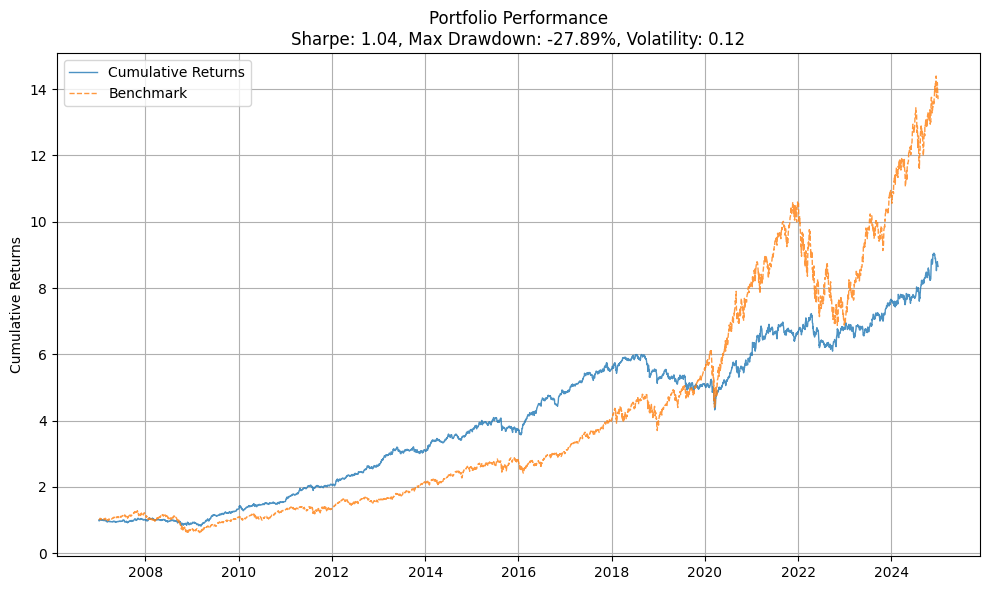

In [51]:
plot_portfolio(out, benchmark = qqq.squeeze(), plot = True)

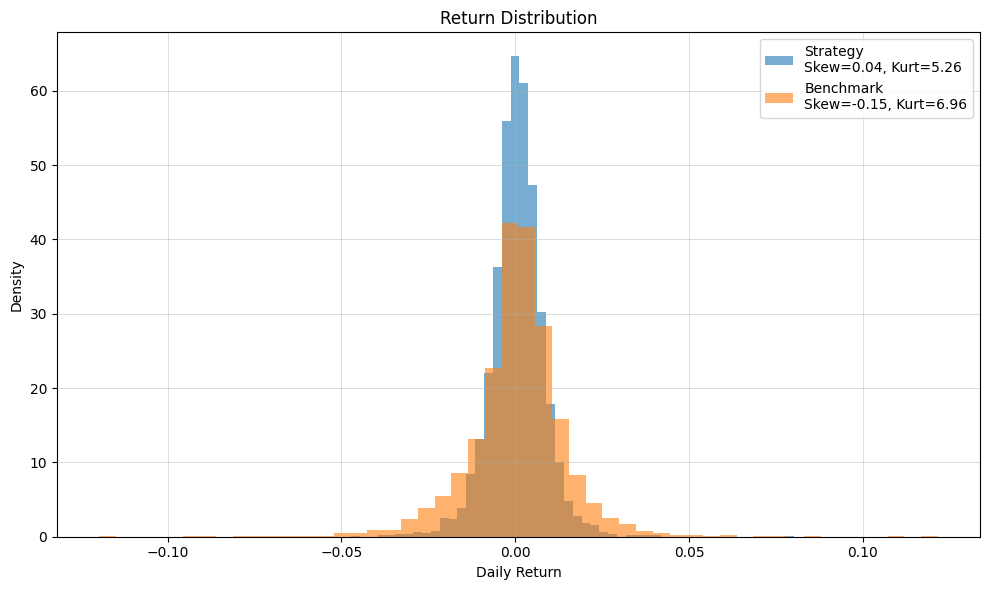

In [45]:
plot_return_distribution_with_stats(out["daily_returns"], qqq.pct_change().dropna())

## Robustness check 

We test the robustness of our strategy by computing the metrics:

- On different periods.
- On different sizes of the window.
- On different minimum expected returns per day (this is where the VIX strategy is activated).  

  I did not investigate the VIX strategy further because my main goal was to make a portfolio drawdown-aware. While the VIX increases the PnL significantly, it does not effectively reduce drawdown. Indeed, when the VIX is low, we reduce α, so the optimization problem tends to create riskier portfolios on otherwise low-risk days.

The results are reported in the pdf


In [46]:
windows_training = [20, 30, 50, 100]

for windwow_training in windows_training :
    
    out = optim.run_monthly_rebalance(  start_date = "2007-01-01",
                                    end_date = "2024-12-31",
                                    trading_days = windwow_training, # I called it trading days but it's rather the size of the window we are using to train on
                                    min_expected_return = 0.0008,
                                    max_weight = 0.1,
                                    long_only = True,
                                    transaction_cost_bps = 5,
                                    solver = ECOS,
                                    verbose = False,
                                    hedge_against = qqq.pct_change(),
                                    vix = None
                                )
    
    plot_portfolio(out, benchmark = qqq.squeeze(), plot = False)
    

Portfolio Metrics:
  Sharpe Ratio: 0.96
  Volatility  : 0.14
  Max Drawdown: -31.08%
  Sortino: 0.95
  cvar: -0.020

Benchmark Metrics:
  Sharpe Ratio: 0.77
  Volatility  : 0.22
  Max Drawdown: -53.40%
  Sortino: 0.72
  cvar: -0.033

Portfolio Metrics:
  Sharpe Ratio: 1.06
  Volatility  : 0.12
  Max Drawdown: -27.42%
  Sortino: 1.05
  cvar: -0.018

Benchmark Metrics:
  Sharpe Ratio: 0.77
  Volatility  : 0.22
  Max Drawdown: -53.40%
  Sortino: 0.72
  cvar: -0.033

Portfolio Metrics:
  Sharpe Ratio: 0.86
  Volatility  : 0.11
  Max Drawdown: -30.57%
  Sortino: 0.83
  cvar: -0.016

Benchmark Metrics:
  Sharpe Ratio: 0.77
  Volatility  : 0.22
  Max Drawdown: -53.40%
  Sortino: 0.72
  cvar: -0.033

Portfolio Metrics:
  Sharpe Ratio: 0.98
  Volatility  : 0.10
  Max Drawdown: -32.12%
  Sortino: 0.94
  cvar: -0.014

Benchmark Metrics:
  Sharpe Ratio: 0.77
  Volatility  : 0.22
  Max Drawdown: -53.40%
  Sortino: 0.72
  cvar: -0.033



In [47]:
start = ["2007-01-01", "2010-01-01", "2013-01-01", "2014-01-01"]
end = ["2010-01-01", "2015-01-01", "2017-01-01", "2022-01-01"]


for s, e in zip(start, end) :
    
    out = optim.run_monthly_rebalance(  start_date = s,
                                    end_date = e,
                                    trading_days = 30, # I called it trading days but it's rather the size of the window we are using to train on
                                    min_expected_return = 0.0008,
                                    max_weight = 0.1,
                                    long_only = True,
                                    transaction_cost_bps = 5,
                                    solver = ECOS,
                                    verbose = False,
                                    hedge_against = qqq.pct_change(),
                                    vix = None
                                )
    
    plot_portfolio(out, benchmark = qqq.squeeze(), plot = False)
    


Portfolio Metrics:
  Sharpe Ratio: 0.67
  Volatility  : 0.17
  Max Drawdown: -22.72%
  Sortino: 0.70
  cvar: -0.023

Benchmark Metrics:
  Sharpe Ratio: 0.22
  Volatility  : 0.29
  Max Drawdown: -53.40%
  Sortino: 0.22
  cvar: -0.043

Portfolio Metrics:
  Sharpe Ratio: 1.97
  Volatility  : 0.11
  Max Drawdown: -10.17%
  Sortino: 2.10
  cvar: -0.014

Benchmark Metrics:
  Sharpe Ratio: 1.08
  Volatility  : 0.17
  Max Drawdown: -16.10%
  Sortino: 1.02
  cvar: -0.026

Portfolio Metrics:
  Sharpe Ratio: 1.54
  Volatility  : 0.10
  Max Drawdown: -12.25%
  Sortino: 1.60
  cvar: -0.014

Benchmark Metrics:
  Sharpe Ratio: 1.10
  Volatility  : 0.15
  Max Drawdown: -16.10%
  Sortino: 1.03
  cvar: -0.023

Portfolio Metrics:
  Sharpe Ratio: 0.94
  Volatility  : 0.11
  Max Drawdown: -27.42%
  Sortino: 0.90
  cvar: -0.017

Benchmark Metrics:
  Sharpe Ratio: 1.09
  Volatility  : 0.20
  Max Drawdown: -28.56%
  Sortino: 0.99
  cvar: -0.031



In [61]:
min_expected_vec = [0.0001, 0.0005, 0.0008, 0.001, 0.005, 0.008, 0.01] # 0.01 + the constraint is too high (approx )

for min_exp in min_expected_vec:
    
    out = optim.run_monthly_rebalance(  start_date = "2010-01-01",
                                    end_date = "2015-12-31",
                                    trading_days = 30, # I called it trading days but it's rather the size of the window we are using to train on
                                    min_expected_return = min_exp,
                                    max_weight = 0.1,
                                    long_only = True,
                                    transaction_cost_bps = 5,
                                    solver = ECOS,
                                    verbose = False,
                                    hedge_against = qqq.pct_change(),
                                    vix = vix
                                )
    
    plot_portfolio(out, benchmark = qqq.squeeze(), plot = False)

Portfolio Metrics:
  Sharpe Ratio: 1.94
  Volatility  : 0.12
  Max Drawdown: -8.75%
  Sortino: 2.24
  cvar: -0.014

Benchmark Metrics:
  Sharpe Ratio: 0.99
  Volatility  : 0.17
  Max Drawdown: -16.10%
  Sortino: 0.95
  cvar: -0.026

Portfolio Metrics:
  Sharpe Ratio: 1.94
  Volatility  : 0.12
  Max Drawdown: -8.75%
  Sortino: 2.24
  cvar: -0.014

Benchmark Metrics:
  Sharpe Ratio: 0.99
  Volatility  : 0.17
  Max Drawdown: -16.10%
  Sortino: 0.95
  cvar: -0.026

Portfolio Metrics:
  Sharpe Ratio: 1.95
  Volatility  : 0.12
  Max Drawdown: -8.75%
  Sortino: 2.24
  cvar: -0.014

Benchmark Metrics:
  Sharpe Ratio: 0.99
  Volatility  : 0.17
  Max Drawdown: -16.10%
  Sortino: 0.95
  cvar: -0.026

Portfolio Metrics:
  Sharpe Ratio: 1.94
  Volatility  : 0.12
  Max Drawdown: -8.75%
  Sortino: 2.24
  cvar: -0.014

Benchmark Metrics:
  Sharpe Ratio: 0.99
  Volatility  : 0.17
  Max Drawdown: -16.10%
  Sortino: 0.95
  cvar: -0.026

Portfolio Metrics:
  Sharpe Ratio: 1.66
  Volatility  : 0.12
  Max D